# Machine learning: Lab 1 (16 BCE 1190)

In [1]:
print ("hello world")

hello world


In [2]:
import pandas as pd

## Reading the dataset: Iris dataset 

In [3]:
iris_data = pd.read_csv("iris-data.csv") #load the dataset into the RAM
                                         #This notebook's directory is the current working directory
                                         #It will look for iris-data.csv in that folder if no path is given
        
print(iris_data)                  #All data in pandas is loaded as a dataframe

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
5                5.4             3.9              1.7             0.4   
6                4.6             3.4              1.4             0.3   
7                5.0             3.4              1.5             NaN   
8                4.4             2.9              1.4             NaN   
9                4.9             3.1              1.5             NaN   
10               5.4             3.7              1.5             NaN   
11               4.8             3.4              1.6             NaN   
12               4.8             3.0              1

In [4]:
print(iris_data.head())           #df.head() prints the first 5 rows.

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


### Understanding the dataset 

In [5]:
#In C we would have an array of just a single datatype. Here in pandas/python, we have multiple datatypes in the same array/dataFrame
print(iris_data['sepal_length_cm'].dtype)
print(iris_data['class'].dtype)

float64
object


In [6]:
iris_data.describe()          #Returns the stats of the data

#count = 150 --> there are 150 rows

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking the data for any discrepancy 

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sb                     #statistical data visualization

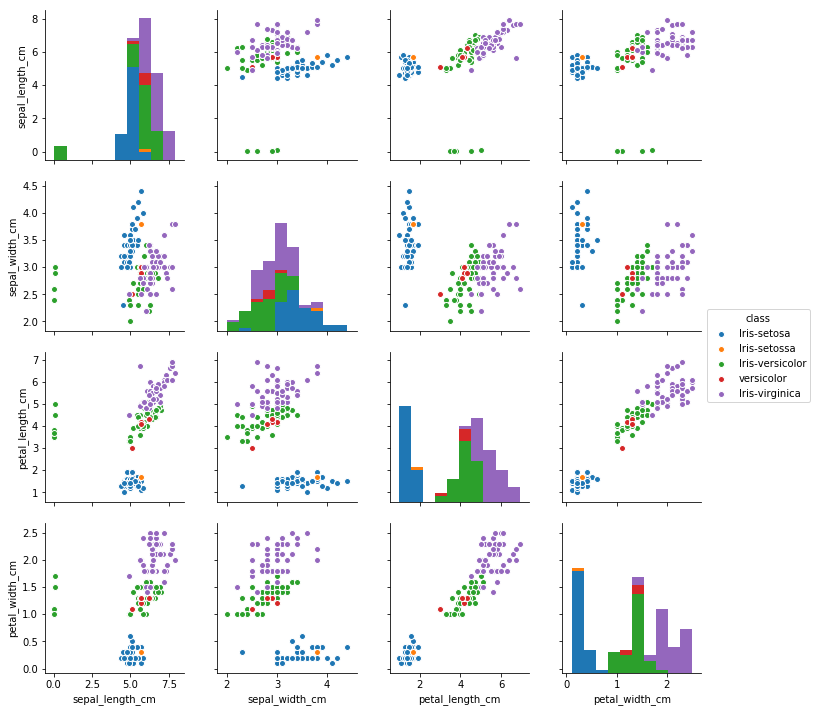

In [8]:
sb.pairplot(iris_data.dropna(), hue='class')

In [9]:
#to understand/analyse the data
#setosa is easily classifiable
#setossa data entry is wrong (spelling mistake)
#iris-versicolor and versicolor are actually same. Therefore, rename.

In [10]:
iris_data.loc[iris_data['class'] =='versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] =='Iris-setossa', 'class'] ='Iris-setosa'

In [11]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

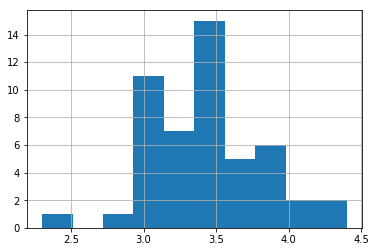

In [12]:
#Re-plot the data with corrected data entries
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

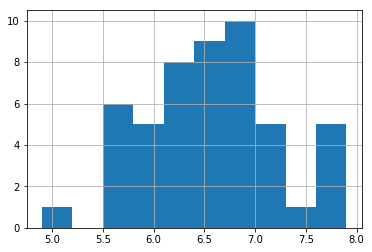

In [13]:
iris_data.loc[iris_data['class'] == 'Iris-virginica', 'sepal_length_cm'].hist()

### Checking for null valued rows and correcting them using mean

In [14]:
iris_data.loc[iris_data['sepal_length_cm'].isnull()|
              iris_data['sepal_width_cm'].isnull()|
              iris_data['petal_length_cm'].isnull()|
              iris_data['petal_width_cm'].isnull()]           #Get rows with NA values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [15]:
#Fill the NaN values for 'petal-width-cm' with the mean value
average_petal_width = iris_data.loc[(iris_data['class'] == 'Iris-setosa', 'petal_width_cm')].mean()
iris_data.loc[(iris_data['class']=='Iris-setosa') & (iris_data['petal_width_cm']).isnull(), 'petal_width_cm'] = average_petal_width

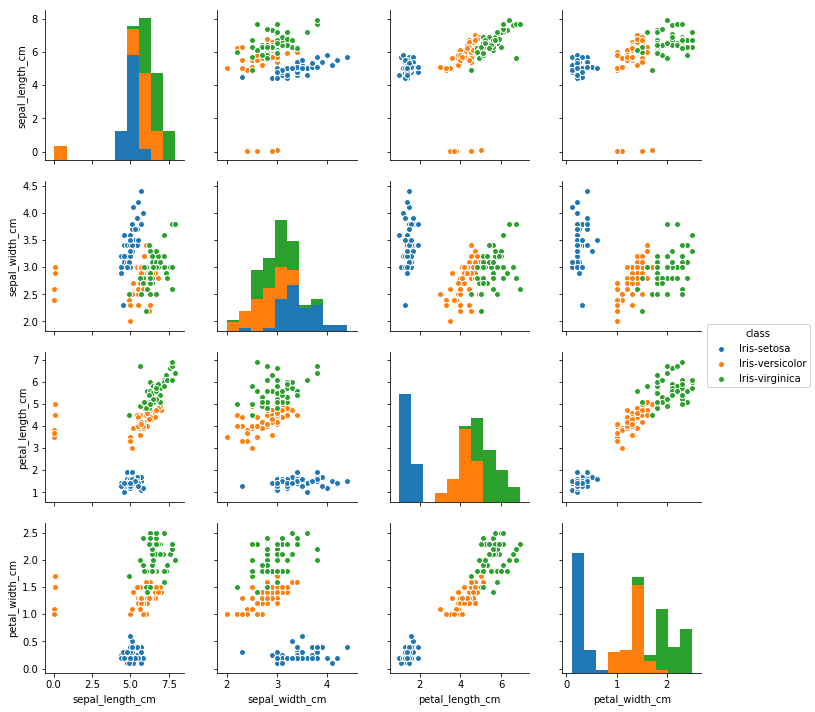

In [16]:
sb.pairplot(iris_data.dropna(), hue='class')

# Machine learning: Lab 2 (16 BCE 1190)

### Obtaining the linearly separable attributes 

In [17]:
#From the above pair plots, we can take the columns that make the data to be linearly separable, with respect to the flower class. Thus we take 'petal length' and 'sepal width'.

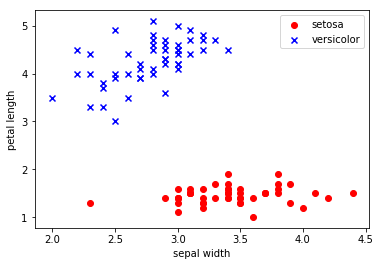

In [18]:
import numpy as np

y = iris_data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = iris_data.iloc[0:100, [1, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.ylabel('petal length')
plt.xlabel('sepal width')
plt.legend(loc='upper right')
plt.show()

### Perceptron implementation 1 (book) 

In [19]:
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [20]:
#We observe the error vs iteration using the following plot.

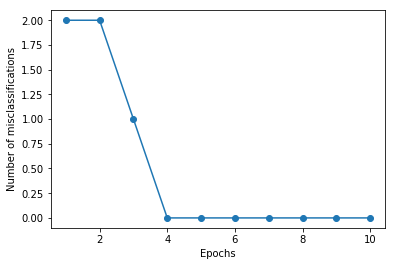

In [21]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [22]:
#Implementation of the visual representation of the decision boundary (perceptron) and the points.

In [23]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

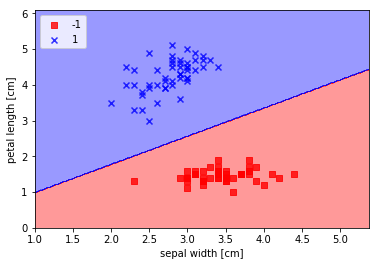

In [24]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Perceptron implementation 2 (sklearn's Perceptron from linear_model)

In [25]:
from sklearn.linear_model import Perceptron
ppn2 = Perceptron(max_iter=40, eta0=0.01, random_state=0)
ppn2.fit(X, y)

#Using default config for the Perceptron

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

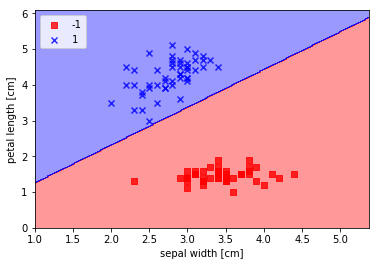

In [26]:
plot_decision_regions(X, y, classifier=ppn2)
plt.ylabel('petal length [cm]')
plt.xlabel('sepal width [cm]')
plt.legend(loc='upper left')
plt.show()

#### We see that the perceptron boundary in sklearn is significantly higher than the book's perceptron algorithm. In this situation, the book's perceptron algorithm seems to be performing better. 